In [1]:
# Setup matplotlib to plot inline (within the notebook)
###

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt
# Import pandas under the abbreviation 'pd'
import pandas as pd
# Import NumPy under the abbreviation 'np'
import numpy as np

In [2]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (all columns except target)
X = heart.drop('target', axis=1)

# Create y (only the target column)
y = heart['target']

In [4]:
# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Use train_test_split to split X & y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# View the different shapes of the training and test datasets
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [6]:

# Import the RandomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instantiate an instance of RandomForestClassifier as clf
clf = RandomForestClassifier().fit(X_train, y_train)

In [7]:
# Fit the RandomForestClassifier to the training data


In [8]:
# Use the fitted model to make predictions on the test data and
# save the predictions to a variable called y_preds
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

In [9]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(1.0, 0.9016393442622951)

In [13]:

# Import LinearSVC from sklearn's svm module
from sklearn.svm import LinearSVC

# Import KNeighborsClassifier from sklearn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Import SVC from sklearn's svm module
from sklearn.svm import SVC

# Import LogisticRegression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression

# Note: we don't have to import RandomForestClassifier, since we already have

In [14]:
models = {'LinearSVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(),
          'RandomforestClassifier': RandomForestClassifier()}

results = {}

In [19]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
results

/Users/jeremiahwise/Desktop/Machine_Learning/Base_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/jeremiahwise/Desktop/Machine_Learning/Base_project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.5737704918032787,
 'KNN': 0.6885245901639344,
 'SVC': 0.6065573770491803,
 'LogisticRegression': 0.8852459016393442,
 'RandomforestClassifier': 0.819672131147541}

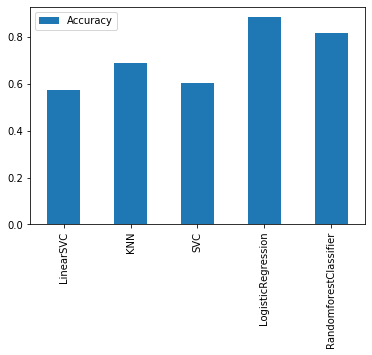

In [21]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=['Accuracy'])

results_df.plot.bar();

In [22]:
# Different LogisticRegression hyperparameters
log_reg_grid = {'C': np.logspace(-4, 4, 10) ,
                'solver': ['liblinear']}

In [27]:
np.random.seed(42)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

# Fit the instance of RandomizedSearchCV
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                                        'solver': ['li

In [28]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 2.782559402207126}

In [29]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442